In [1]:
import os
import sys
import random
import pickle

sys.path.append('..')
sys.path.append('../src')
sys.path.append('../results')

import git
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
dataset = 'email-eucore'
experiment = 'saturation'

In [4]:
rootpath = git.Repo(os.getcwd(), search_parent_directories=True).git.rev_parse("--show-toplevel")
resultspath = f'results/experiment_{experiment}'
filepath = lambda x, y: f'{dataset}_{x}.{y}'

In [5]:
model = 'base'
result = 'mdls'
base_mdls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, mdl = line.strip().split(',')
        trial, mdl = (int(trial), float(mdl))
        
        base_mdls[trial] = mdl

In [6]:
model = 'joint'
result = 'mdls'
joint_mdls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, mdl = line.strip().split(',')
        trial, t1, t2, mdl = (int(trial), int(t1), int(t2), float(mdl))
        
        joint_mdls[(trial, t1, t2)] = mdl

In [7]:
model = 'indep'
result = 'mdls'
indep_mdls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, mdl = line.strip().split(',')
        trial, t1, t2, mdl = (int(trial), int(t1), int(t2), float(mdl))
        
        indep_mdls[(trial, t1, t2)] = mdl

In [8]:
model = 'joint'
result = 'lls'
joint_lls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, ll = line.strip().split(',')
        trial, t1, t2, ll = (int(trial), int(t1), int(t2), float(ll))
        
        joint_lls[(trial, t1, t2)] = ll

In [9]:
model = 'indep'
result = 'lls'
indep_lls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, ll = line.strip().split(',')
        trial, t1, t2, ll = (int(trial), int(t1), int(t2), float(ll))
        
        indep_lls[(trial, t1, t2)] = ll

In [10]:
trials = sorted(list({t for t, t1, t2 in indep_lls}))
time_pairs = sorted(list({(t1, t2) for t, t1, t2 in indep_lls}), key=lambda x: x[0])

In [11]:
xs = [t2 - 197000 for (t, t1, t2), mdl in joint_mdls.items() if t == 1]

base_xs = [t for t, mdl in base_mdls.items()]
base_mdl_ys = [mdl for t, mdl in base_mdls.items()]

joint_mdl_ys = [[mdl for (t, t1, t2), mdl in joint_mdls.items() if t1 == time1 and t2 == time2]
                for (time1, time2) in time_pairs]

joint_mdl_ymins = np.asarray([np.min(mdls) for mdls in joint_mdl_ys])
joint_mdl_ymaxs = np.asarray([np.max(mdls) for mdls in joint_mdl_ys])
joint_mdl_yavgs = np.asarray([np.mean(mdls) for mdls in joint_mdl_ys])
joint_mdl_yerrs = joint_mdl_ymaxs - joint_mdl_ymins

indep_mdl_ys = [[mdl for (t, t1, t2), mdl in indep_mdls.items() if t1 == time1 and t2 == time2]
                for (time1, time2) in time_pairs]

indep_mdl_ymins = np.asarray([np.min(mdls) for mdls in indep_mdl_ys])
indep_mdl_ymaxs = np.asarray([np.max(mdls) for mdls in indep_mdl_ys])
indep_mdl_yavgs = np.asarray([np.mean(mdls) for mdls in indep_mdl_ys])
indep_mdl_yerrs = indep_mdl_ymaxs - indep_mdl_ymins

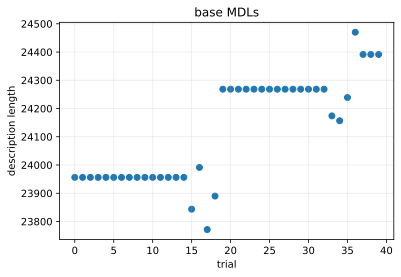

In [12]:
ax = plt.axes()

ax.set_title('base MDLs')
ax.set_xlabel('trial')
ax.set_ylabel('description length')

# plt.style.use('classic')
plt.scatter(base_xs, base_mdl_ys) #, c=base_mdl_ys, cmap='gist_heat')
# ax.fill_between(xs, joint_mdl_ymins, joint_mdl_ymaxs, alpha=0.25, color='black')
plt.grid(alpha=0.25)
plt.savefig("base_random_mdl.pdf", format='pdf', dpi=300)
plt.show()

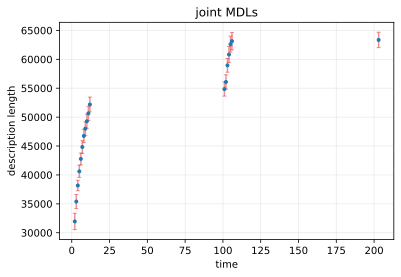

In [13]:
ax = plt.axes()

ax.set_title('joint MDLs')
ax.set_xlabel('time')
ax.set_ylabel('description length')

markers, caps, bars = plt.errorbar(xs, joint_mdl_yavgs, yerr=joint_mdl_yerrs, fmt='.', ecolor='tab:red', capsize=2)
# markers.set_alpha(0.8)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

# plt.scatter(xs, joint_mdl_yavgs, yerr=joint_mdl_yerrs)
# plt.scatter(xs, joint_mdl_ymaxs, color='red', alpha=0.25, marker='_')
# plt.scatter(xs, joint_mdl_ymins, color='green', alpha=0.25, marker='_')
# ax.fill_between(xs, joint_mdl_ymins, joint_mdl_ymaxs, alpha=0.25, color='black')

plt.grid(alpha=0.25)
plt.savefig("joint_random_mdl.pdf", format = 'pdf', dpi=300)
plt.show()

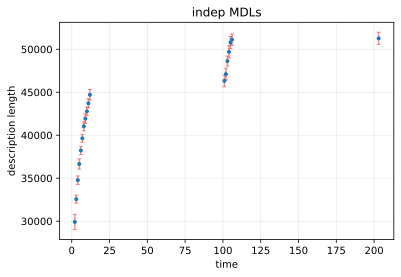

In [14]:
ax = plt.axes()

ax.set_title('indep MDLs')
ax.set_xlabel('time')
ax.set_ylabel('description length')

markers, caps, bars = plt.errorbar(xs, indep_mdl_yavgs, yerr=indep_mdl_yerrs, fmt='.', ecolor='tab:red', capsize=2)
# markers.set_alpha(0.8)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

# plt.scatter(xs, indep_mdl_yavgs, yerr=indep_mdl_yerrs)
# plt.scatter(xs, indep_mdl_ymaxs, color='red', alpha=0.25, marker='_')
# plt.scatter(xs, indep_mdl_ymins, color='green', alpha=0.25, marker='_')
# ax.fill_between(xs, indep_mdl_ymins, indep_mdl_ymaxs, alpha=0.25, color='black')

plt.grid(alpha=0.25)
plt.savefig("indep_random_mdl.pdf", format = 'pdf', dpi=300)
plt.show()

In [15]:
xs = [t2 - 197000 for (t, t1, t2), ll in joint_lls.items() if t == 1]

joint_ll_ys = [[ll for (t, t1, t2), ll in joint_lls.items() if t1 == time1 and t2 == time2]
               for (time1, time2) in time_pairs]

joint_ll_ymins = np.asarray([np.min(lls) for lls in joint_ll_ys])
joint_ll_ymaxs = np.asarray([np.max(lls) for lls in joint_ll_ys])
joint_ll_yavgs = np.asarray([np.mean(lls) for lls in joint_ll_ys])
joint_ll_yerrs = joint_ll_ymaxs - joint_ll_ymins

indep_ll_ys = [[ll for (t, t1, t2), ll in indep_lls.items() if t1 == time1 and t2 == time2]
               for (time1, time2) in time_pairs]

indep_ll_ymins = np.asarray([np.min(lls) for lls in joint_ll_ys])
indep_ll_ymaxs = np.asarray([np.max(lls) for lls in joint_ll_ys])
indep_ll_yavgs = np.asarray([np.mean(lls) for lls in joint_ll_ys])
indep_ll_yerrs = indep_ll_ymaxs - indep_ll_ymins

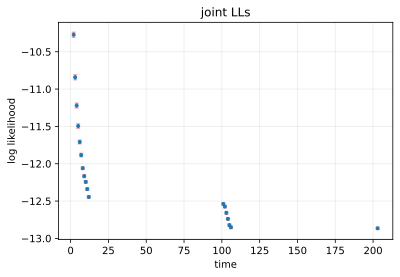

In [16]:
ax = plt.axes()

ax.set_title('joint LLs')
ax.set_xlabel('time')
ax.set_ylabel('log likelihood')

markers, caps, bars = plt.errorbar(xs, joint_ll_yavgs, yerr=joint_ll_yerrs, fmt='.', ecolor='tab:red', capsize=2)
# markers.set_alpha(0.8)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

# plt.scatter(xs, joint_ll_yavgs, yerr=joint_ll_yerrs)
# plt.scatter(xs, joint_ll_ymaxs, color='red', alpha=0.25, marker='_')
# plt.scatter(xs, joint_ll_ymins, color='green', alpha=0.25, marker='_')
# ax.fill_between(xs, joint_ll_ymins, joint_ll_ymaxs, alpha=0.25, color='black')

plt.grid(alpha=0.25)
plt.savefig("joint_random_ll.pdf", format = 'pdf', dpi=300)
plt.show()

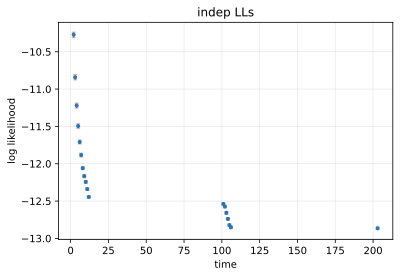

In [17]:
ax = plt.axes()

ax.set_title('indep LLs')
ax.set_xlabel('time')
ax.set_ylabel('log likelihood')

markers, caps, bars = plt.errorbar(xs, indep_ll_yavgs, yerr=indep_ll_yerrs, fmt='.', ecolor='tab:red', capsize=2)
# markers.set_alpha(0.8)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

# plt.scatter(xs, indep_ll_yavgs, yerr=indep_ll_yerrs)
# plt.scatter(xs, indep_ll_ymaxs, color='red', alpha=0.25, marker='_')
# plt.scatter(xs, indep_ll_ymins, color='green', alpha=0.25, marker='_')
# ax.fill_between(xs, indep_ll_ymins, indep_ll_ymaxs, alpha=0.25, color='black')

plt.grid(alpha=0.25)
plt.savefig("indep_random_ll.pdf", format = 'pdf', dpi=300)
plt.show()